In [5]:
# set the working directory to be the root of the package
# so that the imports work below
import sys
sys.path.append("..")

In [6]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import models.xgb as xgb
import models.data_util

In [12]:
data_file = "../data/full.pkl"
model_file = "../data/xgb_model.bin"

In [11]:
# Use helper function to convert everything to numpy etc:
# NOTE: we are temporarily selecting a subset of the columns
# to avoid having to convert non-binary categorical variables
# to a one-hot encoding.
x, y_true = models.data_util.load_raw_data(data_file, cols=['lat',
    'long', 'namechanged', 'namechanged2', 'imd', 'imdu', 'nSIC',
    'oac1', 'CompanyNameCountNum', 'CompanyNameCountX',
    'CompanyNameLen', 'CompanyNameWordLen'])

In [14]:
# load model
model = xgb.from_file(model_file)

In [15]:
# predict probabilities:
y_pred = model.predict(x)

In [17]:
# get ROC graph
fpr, tpr, thresholds = skl.metrics.roc_curve(y_true, y_pred)

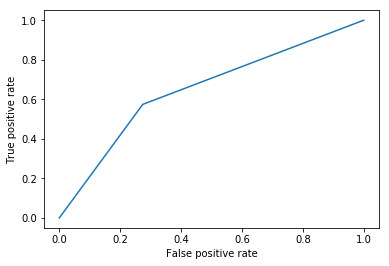

In [19]:
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()